In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import learning_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_validate
import time

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from scipy.signal import savgol_filter

np.random.seed(0)

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 5]

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

path = "coalbumps.csv"
data = pd.read_csv(path)
data = data.sample(frac=1)



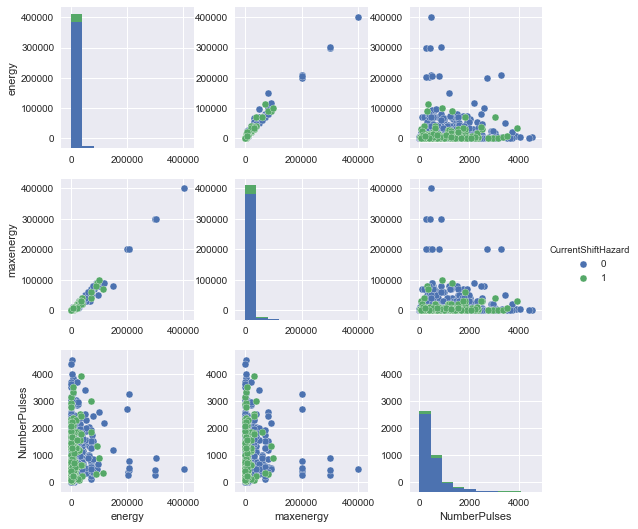

In [7]:
import seaborn as sns
g = sns.pairplot(data, hue="CurrentShiftHazard", vars = ["energy", "maxenergy", "NumberPulses"])

In [8]:
categorical = ["SeismicHazard", "SeismoacousticHazard", "SeismicHazardAssessment", "ShiftType"]
for cats in categorical:
    try:
        dummed = pd.get_dummies(data[cats], prefix = cats)
        data = data.drop(cats, axis=1)
        data = data.join(dummed)
    except KeyError:
        pass

target = 'CurrentShiftHazard'
features = [feature for feature in list(data.head(0)) if feature != target]
    
X = data[features]
y = data[target]

scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)


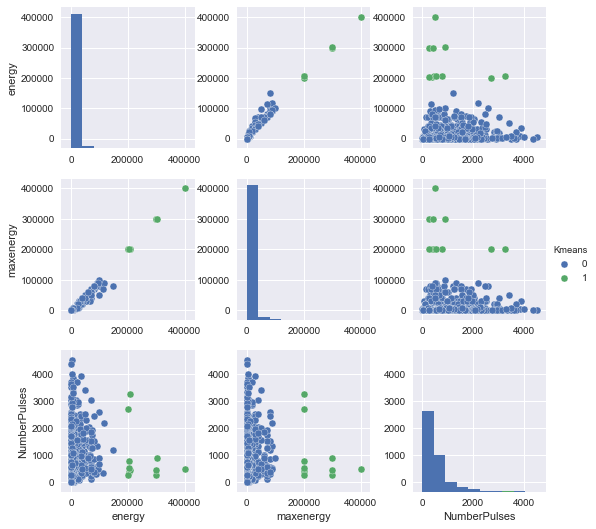

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X)

data["Kmeans"] = kmeans

g = sns.pairplot(data, hue="Kmeans", vars = ["energy", "maxenergy", "NumberPulses"])